# Chipotle **


### Step 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# print the graphs in the notebook
%matplotlib inline
# remember to %matplotlib inline


### Step 2. Import the dataset of `chipotle` and assign it to a variable called chipo.

In [2]:
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Step 3. See the first 10 entries

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 4. Create a histogram of the top 5 items bought

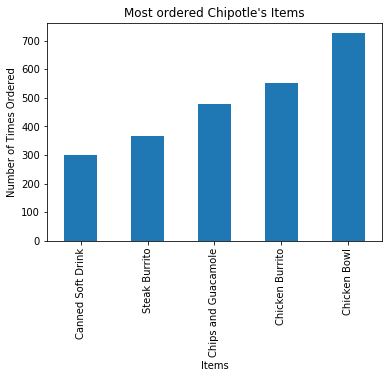

<AxesSubplot:xlabel='item_name', ylabel='quantity'>

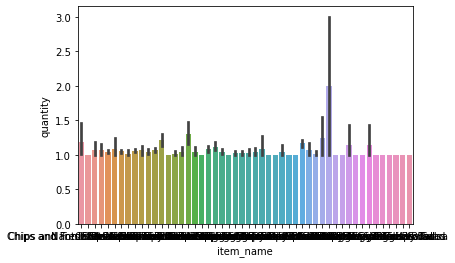

In [8]:
sns.barplot(data=chipo, x=('item_name', units=10, y='quantity')

<AxesSubplot:xlabel='item_name', ylabel='quantity'>

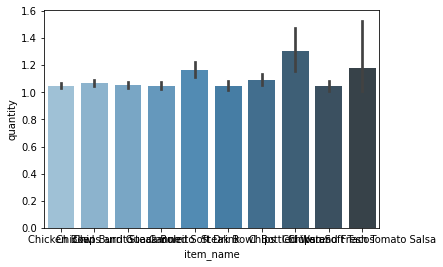

In [13]:
sns.barplot(y="quantity", x='item_name', data=chipo, palette="Blues_d",
              order=chipo.item_name.value_counts().iloc[:10].index)

In [23]:
#Count and group by category
category = chipo.groupby('item_name').agg({'quantity':'sum'}).rename(columns={'quantity':'Number of Times Ordered'}).reset_index()
#Get 10 first categories
category2 = category.sort_values(by=['Number of Times Ordered'], ascending = False).head(5)
category2.head(5)

# https://towardsdatascience.com/data-visualization-cheat-sheet-with-seaborn-and-matplotlib-70cac11c6517

,item_name,Number of Times Ordered
17,Chicken Bowl,761
18,Chicken Burrito,591
25,Chips and Guacamole,506
39,Steak Burrito,386
10,Canned Soft Drink,351


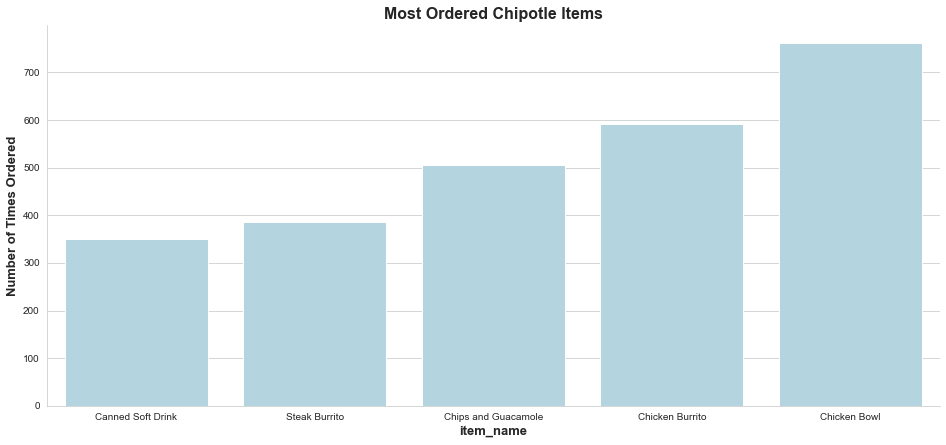

In [30]:
sns.set_style('whitegrid') #set theme
fig,ax=plt.subplots(figsize=(16,7))
#Create barplot
chart2 = sns.barplot(x=category2['item_name'],y=category2['Number of Times Ordered'], order=category2.sort_values('Number of Times Ordered').item_name, color="lightblue")
#Customize chart
chart2.set_ylabel('Number of Times Ordered',weight='bold',fontsize=13)
chart2.set_xlabel('item_name', weight='bold',fontsize=13)
chart2.set_title('Most Ordered Chipotle Items',weight='bold',fontsize=16)
sns.despine()


# https://datavizpyr.com/sort-bars-in-barplot-using-seaborn-in-python/

### Step 5. Create a scatterplot with the number of items orderered per order price

Make sure you get the same labels and title
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [31]:
cat = chipo.groupby('order_id').agg({'quantity':'sum', 'item_price':'sum'}).rename(columns={'quantity':'Items ordered', 'item_price':'Order Price'}).reset_index()
cat
#Get 10 first categories
#category2 = category.sort_values(by=['Number of Times Ordered'], ascending = False).head(5)
#category2.head(5)

,order_id,Items ordered,Order Price
0,1,4,$2.39 $3.39 $3.39 $2.39
1,2,2,$16.98
2,3,2,$10.98 $1.69
3,4,2,$11.75 $9.25
4,5,2,$9.25 $4.45
...,...,...,...
1829,1830,2,$11.75 $11.25
1830,1831,3,$9.25 $2.15 $1.50
1831,1832,2,$8.75 $4.45
1832,1833,2,$11.75 $11.75


In [32]:
chipo["item_price"] = chipo["item_price"].str[1:].astype(float)
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [33]:
cat = chipo.groupby('order_id').agg({'quantity':'sum', 'item_price':'sum'}).rename(columns={'quantity':'Items ordered', 'item_price':'Order Price'}).reset_index()
cat


,order_id,Items ordered,Order Price
0,1,4,11.56
1,2,2,16.98
2,3,2,12.67
3,4,2,21.00
4,5,2,13.70
...,...,...,...
1829,1830,2,23.00
1830,1831,3,12.90
1831,1832,2,13.20
1832,1833,2,23.50


<AxesSubplot:xlabel='Order Price', ylabel='Items ordered'>

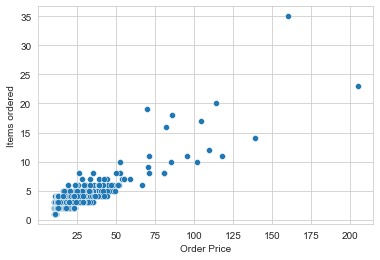

In [35]:
sns.scatterplot(data=cat, x='Order Price', y='Items ordered')